Financial Inclusion in Africa

The objective is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the training data
fin_data=pd.read_csv('Train.csv')
fin_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
#Quick Overview of the data
fin_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [9]:
fin_data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [10]:
#count of each record per country
fin_data['country'].value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

In [11]:
fin_data['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [22]:
country=fin_data.groupby(['country','bank_account']).size().unstack().fillna(0)

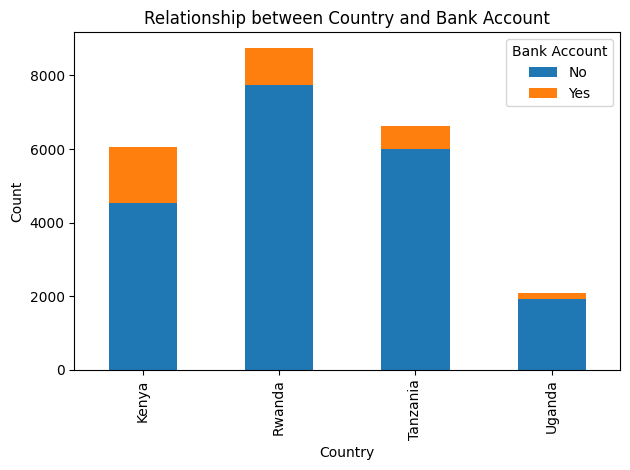

In [23]:
# Plotting a stacked bar plot
country.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Relationship between Country and Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [12]:
fin_data['age_of_respondent'].value_counts()

age_of_respondent
30     1056
35      836
25      792
28      748
32      715
       ... 
100       5
93        4
96        3
99        2
97        1
Name: count, Length: 85, dtype: int64

In [13]:
#distribution of bank_account among the age_of_respondent
distribution=fin_data.groupby(['age_of_respondent','bank_account']).size().unstack().fillna(0)

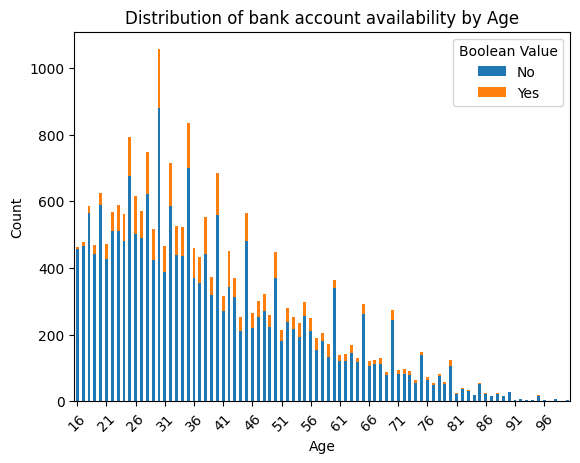

In [16]:
#Visualize distribution in a barplot
import matplotlib.pyplot as plt

distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of bank account availability by Age')
plt.legend(title='Boolean Value')
n = 5  
plt.xticks(range(0, len(distribution.index), n), distribution.index[::n], rotation=45)
plt.show()


In [17]:
fin_data['cellphone_access'].value_counts()

cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64

In [18]:
# Cell pone Access relationship and Bank Account Access
grouped=fin_data.groupby(['cellphone_access','bank_account']).size().unstack().fillna(0)

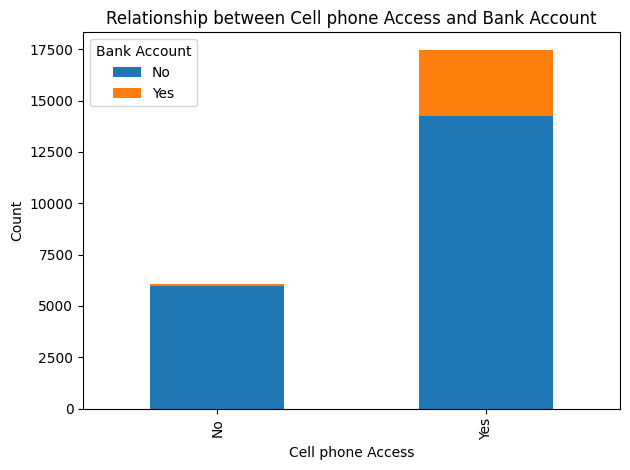

In [20]:
#Visualization of the above
# Plotting a stacked bar plot
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Cell phone Access')
plt.ylabel('Count')
plt.title('Relationship between Cell phone Access and Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

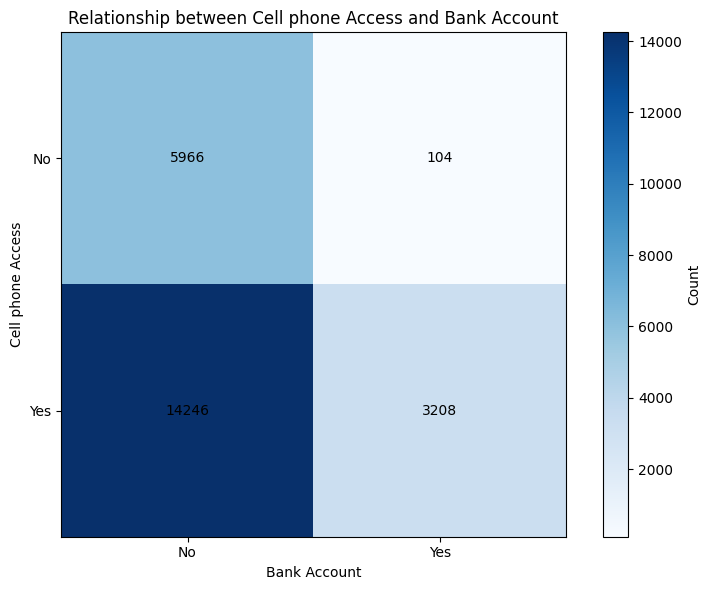

In [21]:
# Creating a contingency table to view the categorical values
contingency_table = pd.crosstab(fin_data['cellphone_access'], fin_data['bank_account'])

# Plotting a heatmap
plt.figure(figsize=(8, 6))
plt.title('Relationship between Cell phone Access and Bank Account')
plt.xlabel('Bank Account')
plt.ylabel('Cell phone Access')
plt.imshow(contingency_table, cmap='Blues', interpolation='nearest')

# Displaying the values in the heatmap
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j, i, contingency_table.iloc[i, j], ha='center', va='center', color='black')

plt.colorbar(label='Count')
plt.xticks(ticks=[0, 1], labels=contingency_table.columns)
plt.yticks(ticks=[0, 1], labels=contingency_table.index)
plt.tight_layout()
plt.show()


In [24]:
fin_data['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [25]:
education=fin_data.groupby(['education_level','bank_account']).size().unstack().fillna(0)

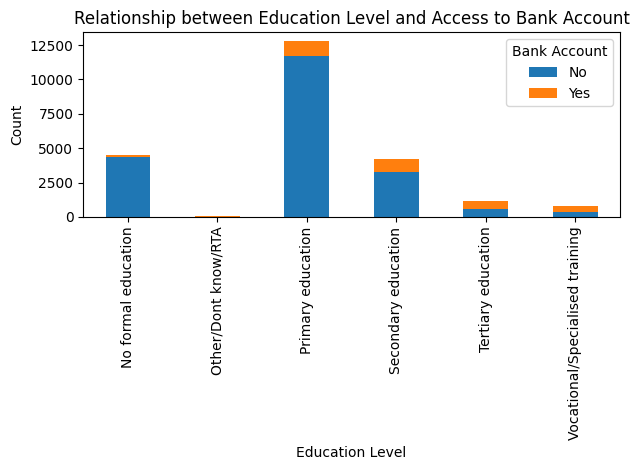

In [26]:
# Plotting a stacked bar plot
education.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship between Education Level and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [27]:
fin_data['gender_of_respondent'].value_counts()

gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

In [28]:
gender=fin_data.groupby(['gender_of_respondent','bank_account']).size().unstack().fillna(0)

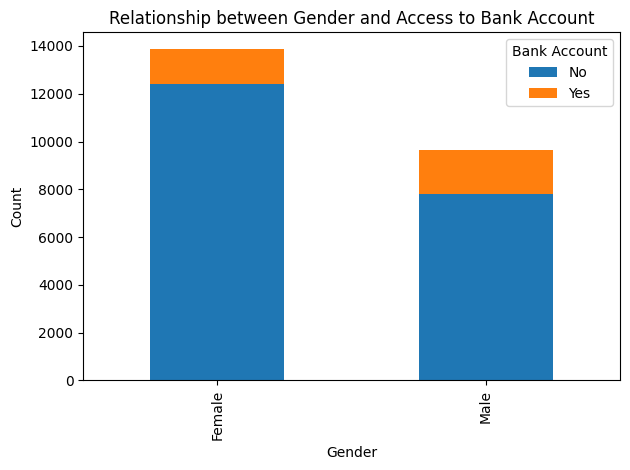

In [29]:
# Plotting a stacked bar plot
gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

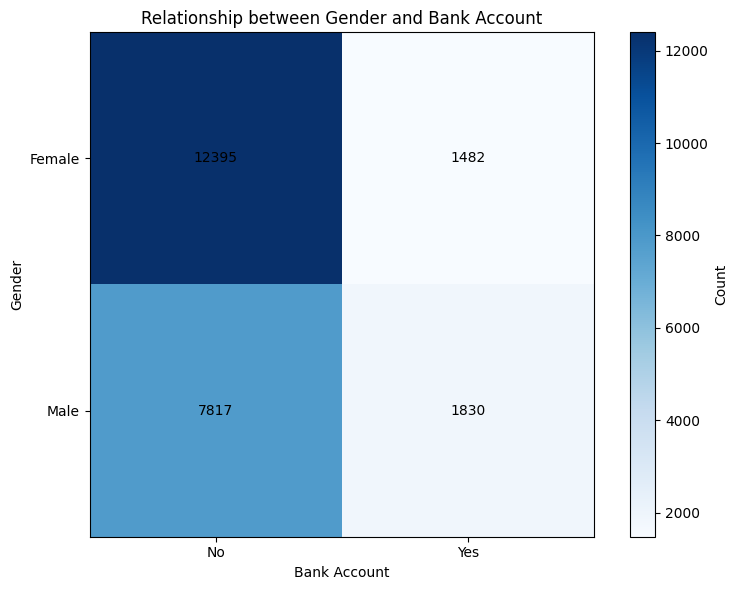

In [30]:
# Creating a contingency table to view the categorical values
contingency_table = pd.crosstab(fin_data['gender_of_respondent'], fin_data['bank_account'])

# Plotting a heatmap
plt.figure(figsize=(8, 6))
plt.title('Relationship between Gender and Bank Account')
plt.xlabel('Bank Account')
plt.ylabel('Gender')
plt.imshow(contingency_table, cmap='Blues', interpolation='nearest')

# Displaying the values in the heatmap
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j, i, contingency_table.iloc[i, j], ha='center', va='center', color='black')

plt.colorbar(label='Count')
plt.xticks(ticks=[0, 1], labels=contingency_table.columns)
plt.yticks(ticks=[0, 1], labels=contingency_table.index)
plt.tight_layout()
plt.show()


In [31]:
fin_data['household_size'].value_counts()

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64

In [32]:
household=fin_data.groupby(['household_size','bank_account']).size().unstack().fillna(0)

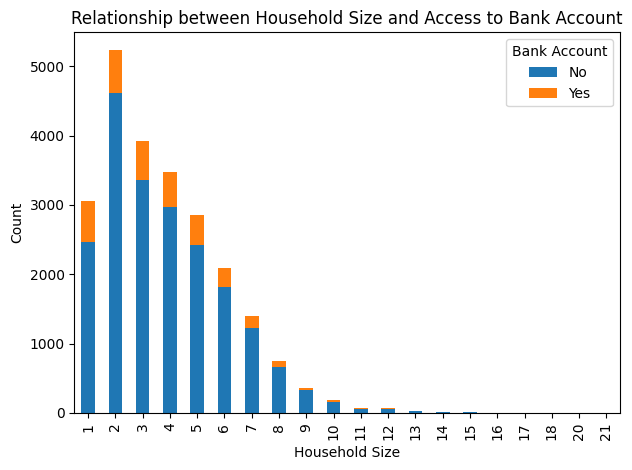

In [34]:
# Plotting a stacked bar plot
household.plot(kind='bar', stacked=True)
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.title('Relationship between Household Size and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [35]:
fin_data['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [37]:
job=fin_data.groupby(['job_type','bank_account']).size().unstack().fillna(0)

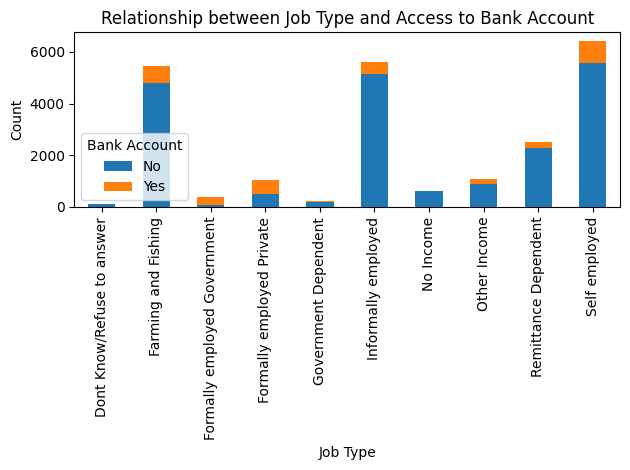

In [39]:
# Plotting a stacked bar plot
job.plot(kind='bar', stacked=True)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Relationship between Job Type and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [40]:
fin_data['location_type'].value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

In [42]:
location=fin_data.groupby(['location_type','bank_account']).size().unstack().fillna(0)

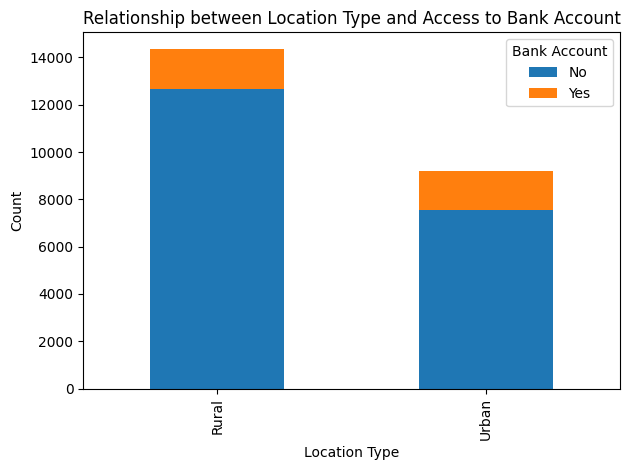

In [43]:
# Plotting a stacked bar plot
location.plot(kind='bar', stacked=True)
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.title('Relationship between Location Type and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [44]:
fin_data['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [45]:
marriage=fin_data.groupby(['marital_status','bank_account']).size().unstack().fillna(0)

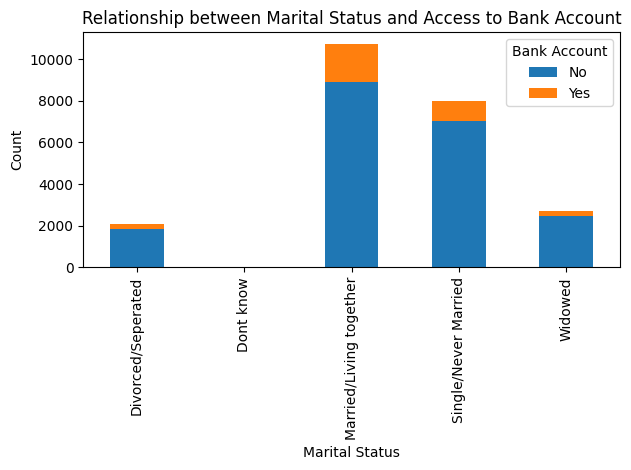

In [46]:
# Plotting a stacked bar plot
marriage.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Relationship between Marital Status and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [48]:
fin_data['relationship_with_head'].value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

In [49]:
relationship=fin_data.groupby(['relationship_with_head','bank_account']).size().unstack().fillna(0)

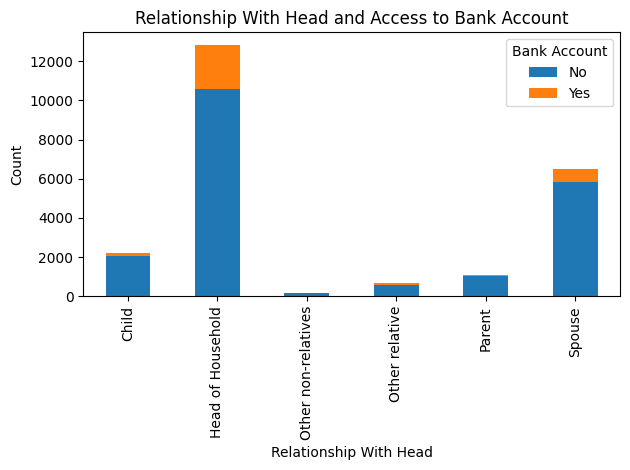

In [50]:
# Plotting a stacked bar plot
relationship.plot(kind='bar', stacked=True)
plt.xlabel('Relationship With Head')
plt.ylabel('Count')
plt.title('Relationship With Head and Access to Bank Account')
plt.legend(title='Bank Account')

plt.tight_layout()
plt.show()

In [51]:
fin_data['uniqueid'].value_counts()

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: count, Length: 8735, dtype: int64

In [52]:
#Show all rows containing uniqueid_1
fin_data[fin_data['uniqueid'] == 'uniqueid_1'].head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7,18,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
14803,Tanzania,2017,uniqueid_1,No,Rural,Yes,6,22,Female,Child,Divorced/Seperated,Secondary education,No Income
21423,Uganda,2018,uniqueid_1,No,Rural,No,5,32,Female,Head of Household,Divorced/Seperated,Primary education,Other Income


In [53]:
# Permanently delete the unique_id
fin_data.drop('uniqueid', axis=1, inplace=True)

In [54]:
fin_data['year'].value_counts()

year
2016    8735
2018    8169
2017    6620
Name: count, dtype: int64

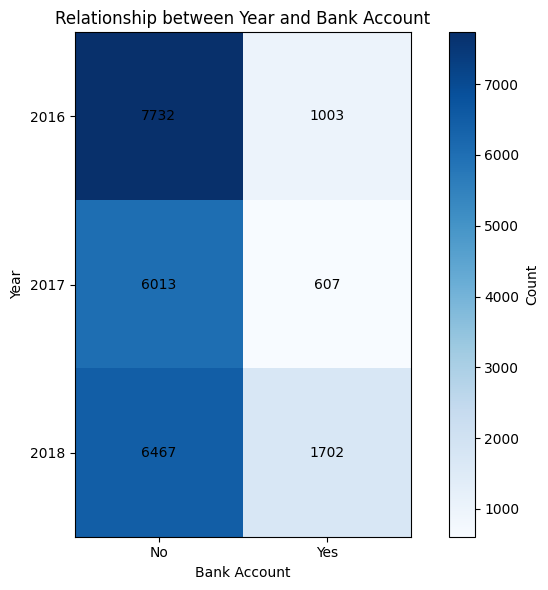

In [57]:
# Creating a contingency table to view the categorical values
contingency_table = pd.crosstab(fin_data['year'], fin_data['bank_account'])

# Plotting a heatmap
plt.figure(figsize=(8, 6))
plt.title('Relationship between Year and Bank Account')
plt.xlabel('Bank Account')
plt.ylabel('Year')
plt.imshow(contingency_table, cmap='Blues', interpolation='nearest')

# Displaying the values in the heatmap
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j, i, contingency_table.iloc[i, j], ha='center', va='center', color='black')

plt.colorbar(label='Count')

# Set ticks and labels based on the number of unique values
plt.xticks(ticks=range(len(contingency_table.columns)), labels=contingency_table.columns)
plt.yticks(ticks=range(len(contingency_table.index)), labels=contingency_table.index)

plt.tight_layout()
plt.show()



In [58]:
#Check for missing values
fin_data.isna().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [60]:
#Check for duplicates
fin_data.duplicated().sum()

4429

In [47]:
#Constructing new dataframe containing integer values
stats_data=pd.DataFrame(fin_data,columns=['age_of_respondent','household_size','year'])

In [6]:
stats_data.head()

,age_of_respondent,household_size,year
0,24,3,2018
1,70,5,2018
2,26,5,2018
3,34,5,2018
4,26,8,2018


In [7]:
stats_data.corr()

,age_of_respondent,household_size,year
age_of_respondent,1.000000,-0.129729,-0.019330
household_size,-0.129729,1.000000,-0.052264
year,-0.019330,-0.052264,1.000000


In [8]:
stats_data.cov()

,age_of_respondent,household_size,year
age_of_respondent,272.929198,-4.774218,-0.270597
household_size,-4.774218,4.962259,-0.098653
year,-0.270597,-0.098653,0.718037
